# Part 1 - Exploratory Data Analysis

### Section 1 : Data Wrangling

####  1.1 Understanding Dataset Description

In [2]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [3]:
# read the csv file
df = pd.read_csv("Life Expectancy Data.csv")
# show first five rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# how many columns are there?
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<b>Note:</b> We can see that the column titles are not clean at all, so we deal with this issue first.

In [5]:
# clean the column titles (using list comprehension technique)
original_cols = list(df.columns)
new_cols = [col.strip().replace(" ", "_").lower() for col in original_cols]
df.columns = new_cols

In [6]:
# check our new column tiles
new_cols

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under-five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

<b>Note:</b> The name of the <i>thinness__1-19_years</i> column does not correctly represent variable descriptions, so it should be renamed to <i>thinness_10-19_years</i>.

In [7]:
# rename the column
df.rename(columns={"thinness__1-19_years":"thinness_10-19_years"}, inplace=True)

#### 1.2 Dealing With Missing Values (Both Implicit and Explicit Ones)

In [8]:
df.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


At first glance, there five things that does not make sense from the above table.
- Adult marotality of 1? This is the same for Under Five Deaths
- Infant dealths of 0 (zero death out of 1000 infants)?
- BMI as lowest as 1 and as highest as 87.3?
- GDP per capita as low as 1.68 (USD)?
- Population of 34 for an entire country?

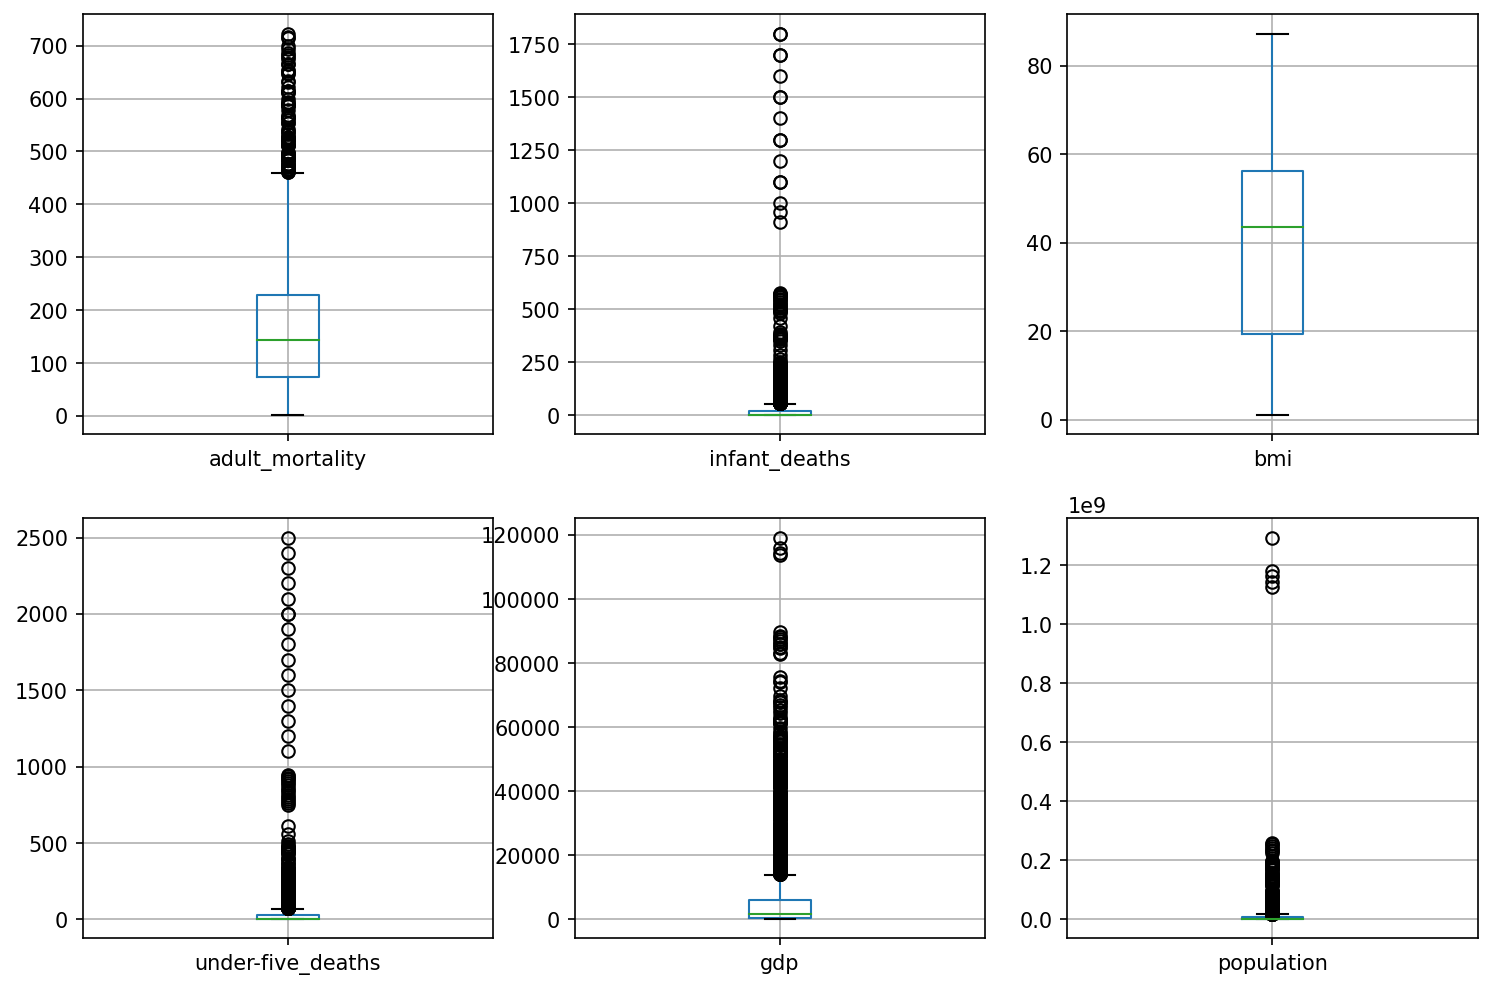

In [9]:
# visualising those outliers
plt.figure(figsize=(12,8), dpi=150)
for i, col in enumerate(["adult_mortality", "infant_deaths", 
                         "bmi", "under-five_deaths", "gdp", "population"], 
                        start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

After looking at the above figures, changes to null will be made for the following:
- Adult mortality rates lower than the 5th percentile
- Infant deaths of 0
- BMI less than 10 and greater than 50
- Under Five deaths of 0

In [10]:
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x:np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x:np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df["under-five_deaths"] = df["under-five_deaths"].replace(0, np.nan)

In [11]:
# to further the understanding upon the above code
print(f"The 5th percile of adult mortality rates is {mort_5_percentile}")

The 5th percile of adult mortality rates is 13.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

From the above infomation, there are a decent amount of null values, so we will build a function to get the information about those explicit null values.

In [13]:
def nulls_breakdown(df=df):
    
    df_cols = list(df.columns)
    cols_total_count = len(df_cols)
    cols_count = 0
    data = {"number of null values":[], "proportion of null values":[]}
    
    for col in df_cols:
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        
        if null_count > 0:
            cols_count += 1
        
        #a dictionary to keep the result
        data["number of null values"].append(null_count)
        data["proportion of null values"].append(str(percent_null) + "%")
        
    print(f"Out of {len(df_cols)} columns, {cols_count} column(s) has null values")
        
    return data
            

In [14]:
pd.DataFrame(data=nulls_breakdown(df), index=df.columns)

Out of 22 columns, 16 column(s) has null values


,number of null values,proportion of null values
country,0,0.0%
year,0,0.0%
status,0,0.0%
life_expectancy,10,0.34%
adult_mortality,155,5.28%
infant_deaths,848,28.86%
alcohol,194,6.6%
percentage_expenditure,0,0.0%
hepatitis_b,553,18.82%
measles,0,0.0%


In [15]:
# deal with those missing values (null values)
df.drop(columns='bmi', inplace=True)

Since proportion of null values in the columns accounts for nearly 50%, so dropping the column would be a good option.

In [16]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [17]:
#imputation by year
imputed_data = []
for year in list(df.year.unique()):
    year_data = df[df.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [18]:
pd.DataFrame(data=nulls_breakdown(df), index=df.columns)

Out of 21 columns, 0 column(s) has null values


,number of null values,proportion of null values
country,0,0.0%
year,0,0.0%
status,0,0.0%
life_expectancy,0,0.0%
adult_mortality,0,0.0%
infant_deaths,0,0.0%
alcohol,0,0.0%
percentage_expenditure,0,0.0%
hepatitis_b,0,0.0%
measles,0,0.0%


#### 1.3 Dealing With Outliers

##### - Detecting outliers

In [19]:
#using boxplot to visualise those outliers with the data
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15,40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title(f"{col} boxplot")
        i += 1
        plt.subplot(9,4,i)
        plt.hist(data[col])
        plt.title(f"{col} histogram")
    plt.show()

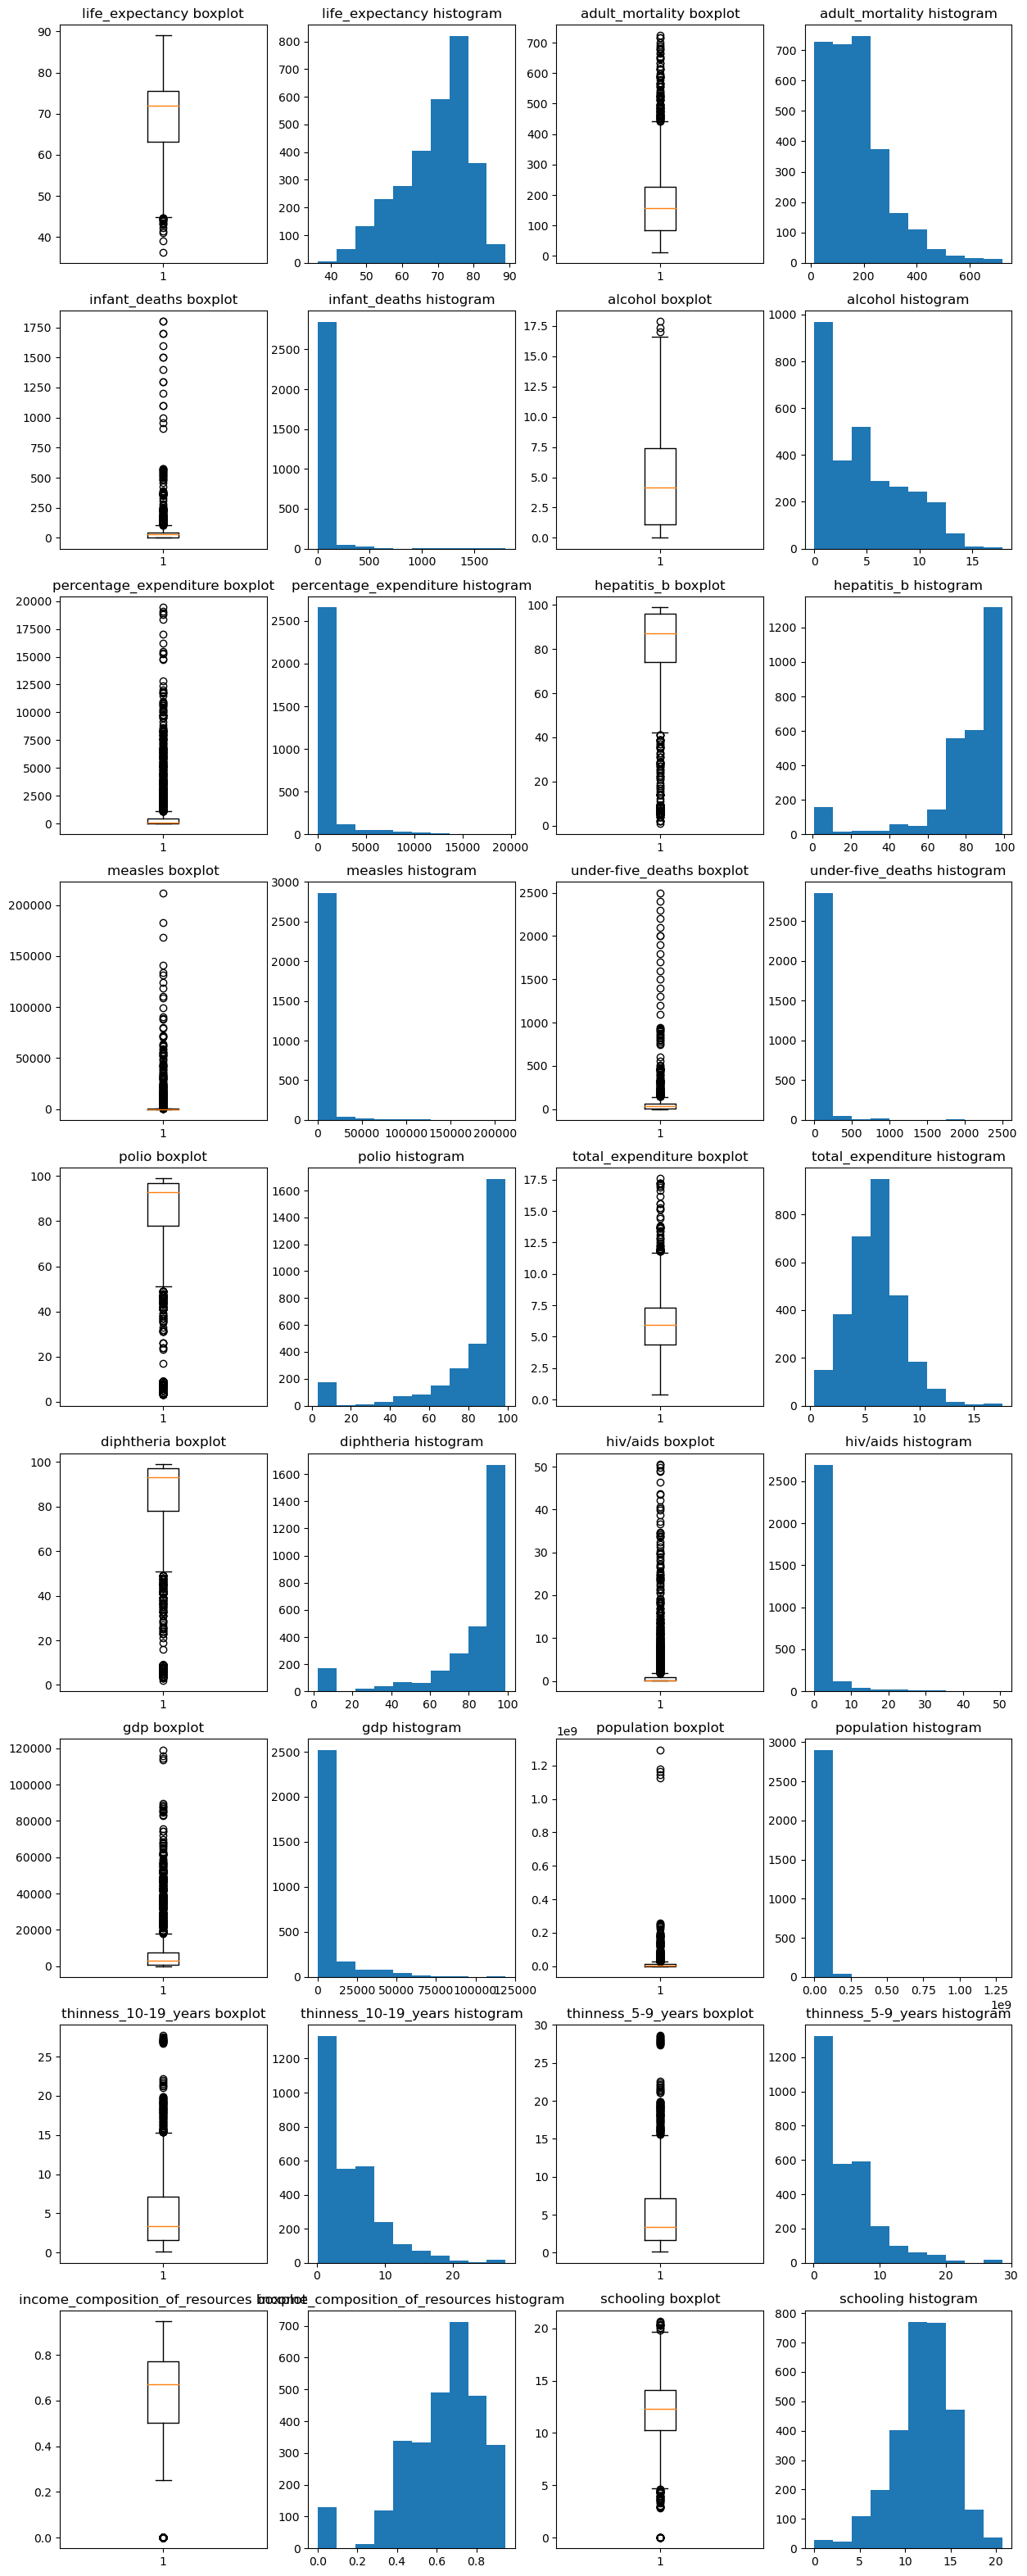

In [20]:
outliers_visual(df)

In [21]:
#Using Tukey's method to statistically analyse the data, which means anything outside 
#of 1.5 times the IQR

def outlier_count(col, data=df):
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    return (outlier_count, outlier_percent)
    

In [22]:
# find out how many outliers in each column

my_dict = {"#OfOutliers":[], "%OfOutliers":[]}

for col in cont_vars:
    count, percent = outlier_count(col, df)
    my_dict["#OfOutliers"].append(count)
    my_dict["%OfOutliers"].append(str(percent)+"%")
    
pd.DataFrame(data=my_dict, index=df.columns[3:])

,#OfOutliers,%OfOutliers
life_expectancy,17,0.58%
adult_mortality,97,3.3%
infant_deaths,135,4.59%
alcohol,3,0.1%
percentage_expenditure,389,13.24%
hepatitis_b,222,7.56%
measles,542,18.45%
under-five_deaths,142,4.83%
polio,279,9.5%
total_expenditure,51,1.74%


##### - Eliminating those outliers using winsorization

In [23]:
# a function to perform winsorization

def test_wins(col, lower_limit=0, upper_limit=0):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    return wins_data

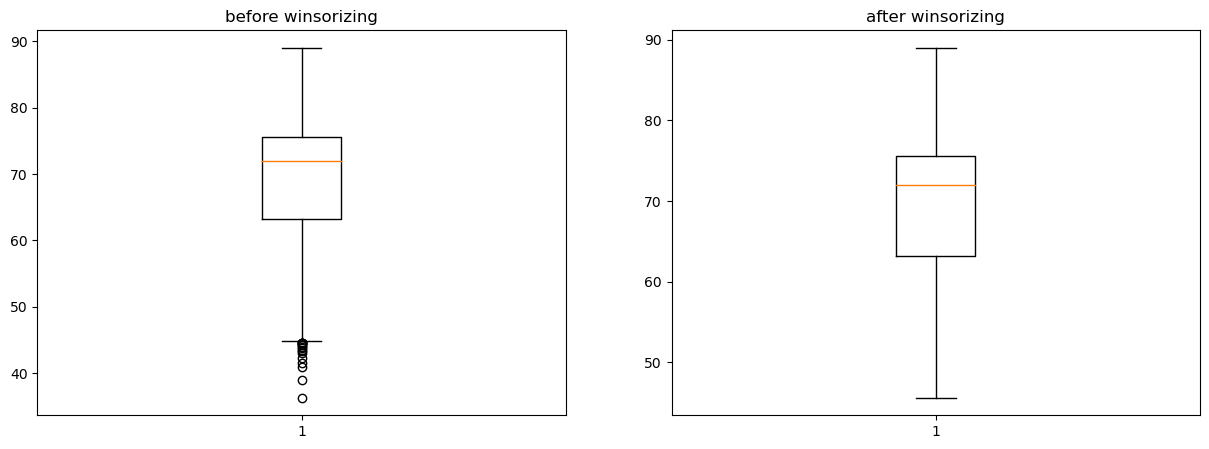

In [24]:
# visually show how winsorization works

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(df['life_expectancy'])
plt.title('before winsorizing')
plt.subplot(122)
plt.boxplot(test_wins(cont_vars[0], lower_limit=0.01))
plt.title('after winsorizing')
plt.show()

In [25]:
# perform winsorization
wins_dict = {}

wins_dict[cont_vars[0]] = test_wins(cont_vars[0], lower_limit=0.1)
wins_dict[cont_vars[1]] = test_wins(cont_vars[1], upper_limit=0.04)
wins_dict[cont_vars[2]] = test_wins(cont_vars[2], upper_limit=0.05)
wins_dict[cont_vars[3]] = test_wins(cont_vars[3], upper_limit=0.0025)
wins_dict[cont_vars[4]] = test_wins(cont_vars[4], upper_limit=0.135)
wins_dict[cont_vars[5]] = test_wins(cont_vars[5], lower_limit=0.1)
wins_dict[cont_vars[6]] = test_wins(cont_vars[6], upper_limit=0.19)
wins_dict[cont_vars[7]] = test_wins(cont_vars[7], upper_limit=0.05)
wins_dict[cont_vars[8]] = test_wins(cont_vars[8], lower_limit=0.1)
wins_dict[cont_vars[9]] = test_wins(cont_vars[9], upper_limit=0.02)
wins_dict[cont_vars[10]] = test_wins(cont_vars[10], lower_limit=0.105)
wins_dict[cont_vars[11]] = test_wins(cont_vars[11], upper_limit=0.185)
wins_dict[cont_vars[12]] = test_wins(cont_vars[12], upper_limit=0.105)
wins_dict[cont_vars[13]] = test_wins(cont_vars[13], upper_limit=0.07)
wins_dict[cont_vars[14]] = test_wins(cont_vars[14], upper_limit=0.035)
wins_dict[cont_vars[15]] = test_wins(cont_vars[15], upper_limit=0.035)
wins_dict[cont_vars[16]] = test_wins(cont_vars[16], lower_limit=0.05)
wins_dict[cont_vars[17]] = test_wins(cont_vars[17], lower_limit=0.025, upper_limit=0.005)

In [26]:
# a new dataframe with the winsorized data
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [27]:
wins_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,54.8,335.0,66.000000,5.288333,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


### Section 2: Data Exploration

##### - Descriptive Statistics

In [28]:
wins_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life_expectancy,2938.0,6.968334e+01,8.604161e+00,54.80000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
adult_mortality,2938.0,1.691913e+02,1.076460e+02,13.00000,84.000000,1.570000e+02,2.270000e+02,4.280000e+02
infant_deaths,2938.0,2.860732e+01,2.569953e+01,1.00000,4.000000,2.800000e+01,4.376692e+01,9.500000e+01
alcohol,2938.0,4.640667e+00,3.910036e+00,0.01000,1.092500,4.140000e+00,7.390000e+00,1.514000e+01
percentage_expenditure,2938.0,2.815011e+02,3.841614e+02,0.00000,4.685343,6.491291e+01,4.415341e+02,1.077712e+03
hepatitis_b,2938.0,8.367129e+01,1.384893e+01,55.00000,74.099237,8.700000e+01,9.600000e+01,9.900000e+01
measles,2938.0,2.206913e+02,3.291923e+02,0.00000,0.000000,1.700000e+01,3.602500e+02,8.310000e+02
under-five_deaths,2938.0,3.864055e+01,3.773234e+01,1.00000,4.000000,3.400000e+01,6.001481e+01,1.380000e+02
polio,2938.0,8.551468e+01,1.527093e+01,52.00000,78.000000,9.300000e+01,9.700000e+01,9.900000e+01


##### - Visual Distributions

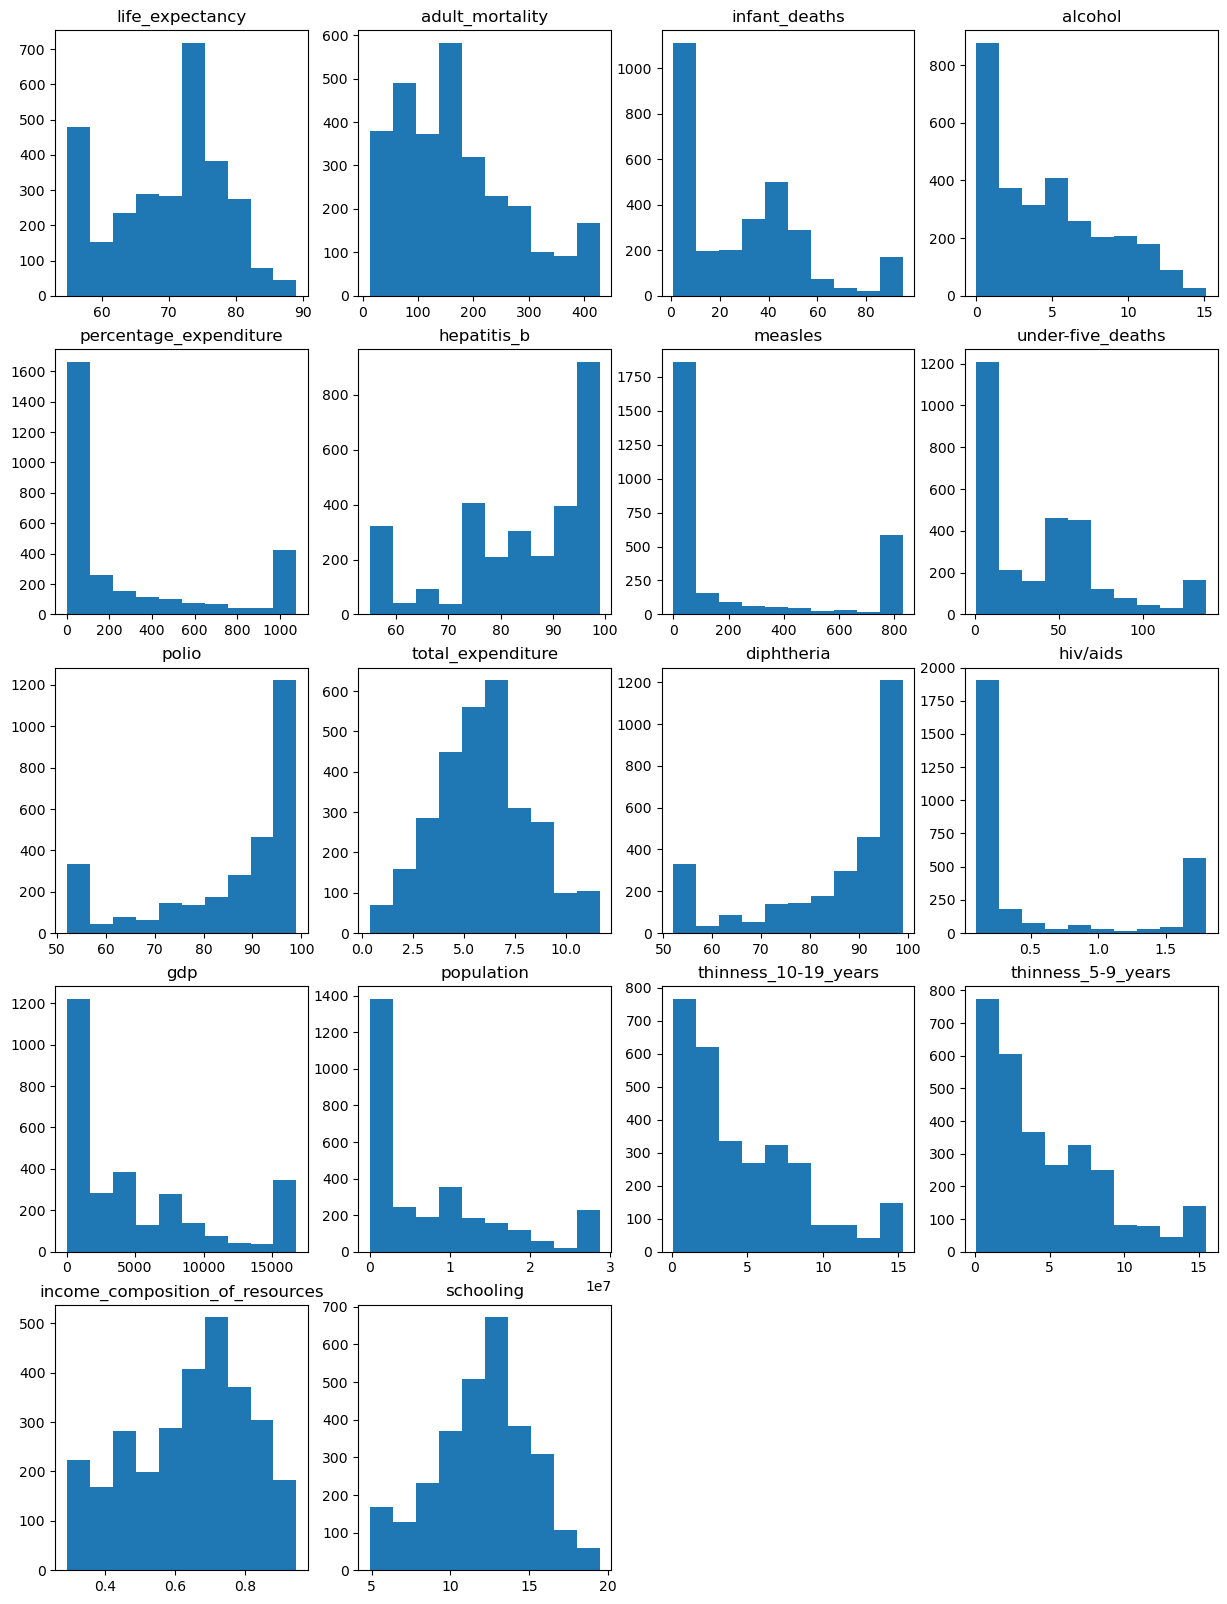

In [29]:
# after cleaning process
plt.figure(figsize=(15,20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

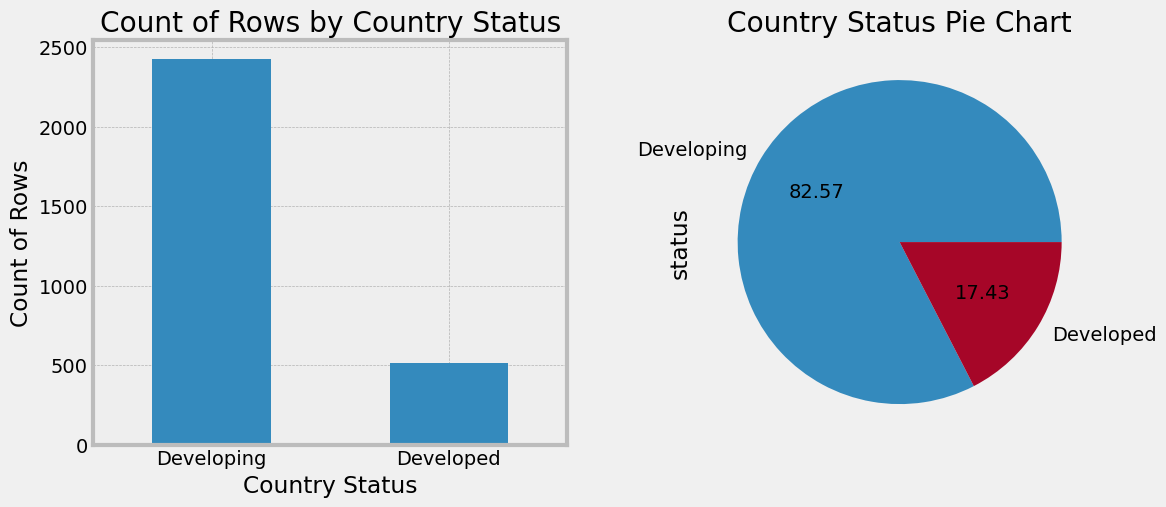

In [71]:
# number of developing countries and its proportion in the data

plt.figure(figsize=(12,5))
plt.style.use('bmh')

plt.subplot(121)
wins_df.status.value_counts().plot(kind='bar')
plt.title("Count of Rows by Country Status")
plt.xlabel("Country Status")
plt.ylabel("Count of Rows")
plt.xticks(rotation=0)

plt.subplot(122)
wins_df["status"].value_counts().plot(kind="pie", y="",autopct="%.2f")
plt.title("Country Status Pie Chart")

plt.show()